#Google Colab用
あなたのGoogleアカウントのGoogle Driveに、ai_questというフォルダを作り、そこに

*   train.zip
*   test.zip
*   train_master.tsv

を保存してください。

**!pip install -r requirements.txt
は実行しなくて良いです。**

してしまった場合は「ランタイム」->「ランタイムを出荷時設定にリセット」を行なってこのNotebookの一番上から実行し直してください。


In [1]:
# from google.colab import drive
# drive.mount('./gdrive', force_remount=True)

In [2]:
! pip3 install signate
! signate token --email=yakiniku0831@gmail.com --password=md2yMqU8X9JJAq2

     |████████████████████████████████| 138 kB 9.1 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=6912221b31f0404604d67a6ed5740de70d4982bcb9e017460ce8850e23dd8a4f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.6 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
The API Token has been downloaded successfully.


In [3]:
! signate list

  competitionId  title                                                                                  closing     prize            submitters
---------------  -------------------------------------------------------------------------------------  ----------  -------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                   -                                  5121
             24  【練習問題】お弁当の需要予測                                                           -                                  6299
             27  【練習問題】Jリーグの観客動員数予測                                                    -                                  1430
            100  【練習問題】手書き文字認識                                                             -           Knowledge               157
            102  【練習問題】タイタニックの生存予測                                                     -           Knowledge              1049
            103  【練習問題】音楽ラベリング                                         

In [4]:
! signate files --competition-id=499

  fileId  name                                           title                                                size  updated_at
--------  ---------------------------------------------  ----------------------------------------------  ---------  -------------------
    2219  PBL02_h_exercise4_question.pdf                 PBL02_不良個所自動検出_h.演習④設問                1417656  2021-08-19 15:22:04
    2220  PBL02_i_exercise4_supplementary-documents.pdf  PBL02_不良個所自動検出_i.演習④ガイドコンテンツ     470147  2021-08-19 15:22:07
    2138  train.zip                                      学習用画像データ                                183977509  2021-08-19 15:22:07
    2139  test.zip                                       評価用画像データ                                151304061  2021-08-19 15:22:07
    2140  train_master.tsv                               学習用画像データとラベルIDの対応表                   5221  2021-08-19 15:22:07
    2141  sample_submit.tsv                              応募用サンプルファイル                                100  2021-08-19 15:

In [5]:
! signate download --competition-id=499

sample_submit.tsv

requirements.txt

train_master.tsv

PBL02_sample_code.ipynb

PBL02_i_exercise4_supplementary-documents.pdf

PBL02_h_exercise4_question.pdf

test.zip

train.zip


Download completed.


In [6]:
# 画像データの展開
!mkdir -p ./Data/kiban/
!unzip -o ./train.zip -d ./Data/kiban/
!unzip -o ./test.zip -d ./Data/kiban/
!cp ./train_master.tsv ./Data/kiban/
# validation用のフォルダを作成
!mkdir -p ./Data/kiban/valid/
!mkdir -p ./Data/kiban/valid/regular/
!mkdir -p ./Data/kiban/valid/potato/
!mkdir -p ./Data/kiban/valid/horn/
!mkdir -p ./Data/kiban/valid/bridge/


Archive:  ./train.zip
   creating: ./Data/kiban/train/
   creating: ./Data/kiban/train/bridge/
  inflating: ./Data/kiban/train/bridge/bridge_000.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_001.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_002.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_003.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_004.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_005.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_006.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_007.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_008.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_009.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_010.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_011.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_012.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_013.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_014.jpeg  
  inflating: ./Data/kiban/train/bridge/bridge_015.

In [7]:
import os
import pandas as pd
# trainからvalidationを作る
train_master = pd.read_csv('./Data/kiban/train_master.tsv')


In [8]:
train_master.head()

,file_name,flag
0,bridge_000.jpeg,1
1,bridge_001.jpeg,1
2,bridge_002.jpeg,1
3,bridge_003.jpeg,1
4,bridge_004.jpeg,1


In [9]:

train_master.loc[:, "folder"] = train_master.file_name.str.replace("_[0-9]+?\.jpeg", "/")


# ランダム２.5割をvalidationにする
valid = train_master.sample(frac=0.25)
# ランダム2.5割の画像をvalidフォルダへ移動
for index, item in valid.iterrows():
  train_image_path = f'./Data/kiban/train/{item["folder"]}{item["file_name"]}'
  valid_image_path_to = train_image_path.replace("train", "valid")
  os.rename(train_image_path, valid_image_path_to)

# PBL02_不良個所自動検出 良否判定モデル構築用サンプルコード

本jupyter notebookはPBL02_不良個所自動検出のサンプルコードです。<br>
**で囲まれた箇所をご自身の環境に合わせて変更いただいた上で本jupyter notebookを上から下まで実行いただけると提出可能なファイルが出力されます。<br>
<br>
本jupyter notebookの構成は以下のようになっております。<br>
<ol>
<li>ライブラリimport</li>
    必要なライブラリのimportを行う。
<li>パラメータ設定</li>
    画像分類アルゴリズム"VGG"に関する設定とデータ、ウェイトのパス設定を行う。
<li>VGGのネットワーク定義</li>
    VGGのネットワークを本課題向けにカスタマイズし、カスタマイズしたVGGを宣言する。<br>
    具体的には、VGGの基本設定、事前重み有無設定、出力層のカスタマイズを行う。
<li>学習・検証データの読み込み</li>
    2. で指定した格納先の学習・検証データを読み込む。
<li>モデルの学習</li>
    読み込んだデータを用いてVGGを学習させる。
<li>モデルによる判定</li>
    構築したモデルによる判定を実施する。
<li>学習・検証データに対する精度評価</li>
    学習・検証データに対する精度をf1 scoreで評価する。
<li>提出ファイルの出力</li>
    テストデータに対して良否判定を行い、その結果を提出フォーマットであるtsv形式で出力を行う。
</ol>

## 1. ライブラリimport

In [10]:
# import os
import cv2
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
)    
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
import tensorflow as tf
tf.random.set_seed(1)
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 2. パラメータ設定

画像分類アルゴリズム"VGG"に関する設定とデータとウェイトのパス設定を行います。<br>
次セルの「画像分類アルゴリズム"VGG"に関する設定」でパラメータを変更することにより、精度向上が期待できます。

In [11]:
# 画像分類アルゴリズム"VGG"に関する設定
# 入力画像サイズの高さと幅
IMG_WIDTH, IMG_HEIGHT = 224, 224
TARGET_SIZE = (IMG_WIDTH, IMG_HEIGHT)
# 判定分類数（4分類を判定するモデルを構築し、そのモデルの判別結果を最後に良品、不良品の2分類に変換する前提）
NB_CLASSES = 4
# 学習時のエポック数
EPOCHS = 30
# バッチサイズ
BATCH_SIZE = 5

In [12]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

In [13]:
# データとウェイトに関する設定
train_data_dir = "./Data/kiban/train/" # 学習データ保存先にはbridge, horn, potato, regularのフォルダがあり、各フォルダ配下に画像が格納されている想定
validation_data_dir = "./Data/kiban/valid/" # 検証データ保存先にはbridge, horn, potato, regularのフォルダがあり、各フォルダ配下に画像が格納されている想定
test_data_dir = "./Data/kiban/test/" # テストデータ保存先には画像データが格納されている想定

from datetime import datetime
os.makedirs("./weights", exist_ok=True)
weight_dir = "./weights/"
save_weights_path = os.path.join(weight_dir, 'weight_' + datetime.today().strftime('%Y-%m-%d-%H:%M:%S')) 

## 3. VGGのネットワーク定義

VGGのネットワークを本課題向けにカスタマイズし、カスタマイズしたVGGを宣言します。<br>
具体的には、VGGの基本設定、事前重み有無設定、出力層のカスタマイズなどを行います。<br>
「VGGの学習方法の定義」セルにてoptimizerの種類と学習率を変更することにより、精度向上が期待できます。

In [14]:
# VGGの基本設定
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# ネットワーク構造の確認
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
# 出力に近い層を本課題に合わせて変更
top_model = base_model.output
top_model = Flatten(name='flatten')(top_model)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(NB_CLASSES, activation='softmax')(top_model)

In [16]:
# カスタマイズ後のVGGの定義
model = Model(
    inputs=base_model.input,
    outputs=top_model
)
for layer in base_model.layers:
    layer.trainable = False

In [17]:
#  VGGの学習方法の定義
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4), #optimizerの種類（"RMSprop"の箇所）と学習率（"lr"の箇所）を変更することにより、精度向上が期待できます。
    metrics=['accuracy'],
)

In [18]:
# ネットワーク構造の確認
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 4. 学習・検証データの読み込み

2.で指定した格納先の学習・検証データを読み込みます。<br>
読み込み前、読み込み時にこれらのデータに前処理（特徴量の強調、クラス分布の平準化、データの分布平準化）を施すことで精度向上が期待できます。

In [19]:
# VGGに入力できるよう画像サイズの圧縮
train_datagen = ImageDataGenerator(rescale=1.0/255) # 前処理を（）内に追加可能
valid_datagen = ImageDataGenerator(rescale=1.0/255) # 前処理を（）内に追加可能
# test_datagen = ImageDataGenerator(rescale=1.0/255)

In [20]:
#学習・検証データの読み込み
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Found 218 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [21]:
# 学習・検証データとして上記にて読み込んだ画像を設定
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

## 5. モデルの学習

読み込んだデータを用いてVGGを学習させます。

In [22]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples/BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples/BATCH_SIZE
)
model.save_weights(save_weights_path)

Epoch 1/30
43/43 [==============================] - 84s 1s/step - loss: 1.8787 - accuracy: 0.3532 - val_loss: 1.1899 - val_accuracy: 0.3889
Epoch 2/30
43/43 [==============================] - 47s 1s/step - loss: 1.4809 - accuracy: 0.4174 - val_loss: 1.2571 - val_accuracy: 0.4444
Epoch 3/30
43/43 [==============================] - 47s 1s/step - loss: 1.3323 - accuracy: 0.4083 - val_loss: 1.4282 - val_accuracy: 0.3889
Epoch 4/30
18/43 [===========>..................] - ETA: 21s - loss: 1.1799 - accuracy: 0.4889

KeyboardInterrupt: ignored

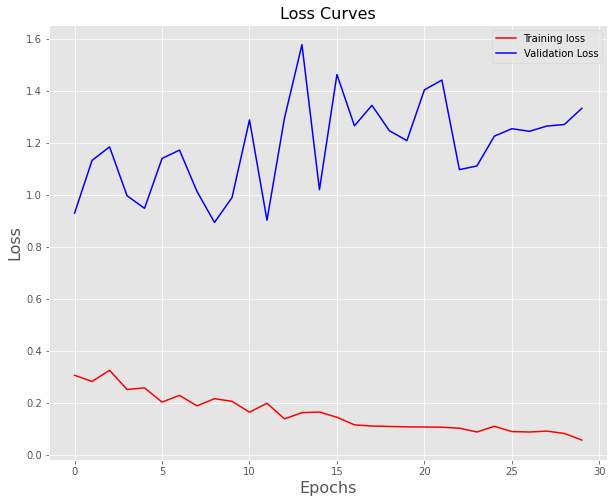

In [ ]:
# loss curveの表示
plt.figure(figsize=[10,8])
plt.plot(model.history.history['loss'], 'r')
plt.plot(model.history.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

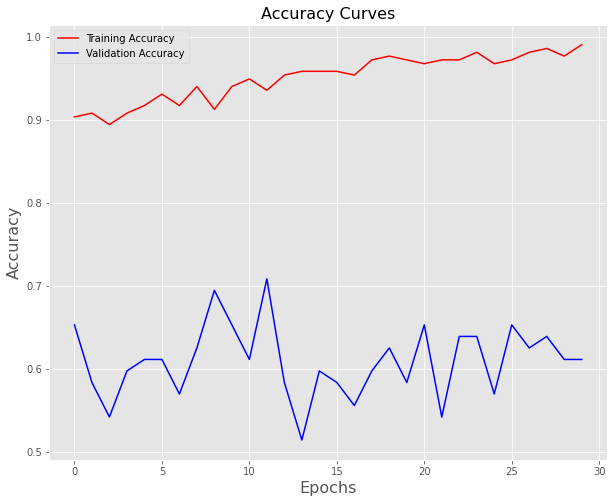

In [ ]:
# accuracy curveの表示
plt.figure(figsize=[10,8])
plt.plot(model.history.history['accuracy'], 'r')
plt.plot(model.history.history['val_accuracy'], 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## 6. モデルによる判定

構築したモデルによる判定を行います。

In [ ]:
# weightファイルの読み込み
print('load model...')
model.load_weights(save_weights_path)

load model...


In [ ]:
# 良否判定実行関数
def get_predict(model,
                train_data_dir: str,
                test_data_dir: str):
    """This function will performs model inferencing using test data
    and stores the results into the lists.
    
    Args:
        model (object): The trained model.
        train_data_dir (str): The location of train images.
        test_data_dir (str): The location of test images.
        
    Returns:
        filenames (list): filenames of predicted images.
        true_classes (list): true classes of predicted images.
        pred_classes (list): prediction classes of predicted images.
    """
    
    data_datagen = ImageDataGenerator(rescale=1/255.)

    test_generator = data_datagen.flow_from_directory(
        test_data_dir,
        target_size=TARGET_SIZE,
        class_mode=None,
        batch_size=1,
        shuffle=False,
    )
    preds = model.predict(test_generator)

    preds_class_idx = preds.argmax(axis=-1)
    
    # get prediction class
    train_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
    )
    
    idx_to_class = {v: k for k, v in train_generator.class_indices.items()}
    pred_classes = np.vectorize(idx_to_class.get)(preds_class_idx)
    filenames_to_class = list(zip(test_generator.filenames, pred_classes))
    
    # get true class
    filenames = []
    true_classes = []

    for item in test_generator.filenames:
        filenames.append(item)
        # get true class from the filenames
        true_class = item.split('/')[0]
        true_classes.append(true_class)
    
    return filenames, true_classes, pred_classes

In [ ]:
# 精度算出関数
def get_f1(true_labels_list: list,
           predictions_list: list,
           average_method: str,
          ) -> (float, float, float):
    """This function will performs model inferencing using test data
    and stores the results into the lists.
    
    Args:
        true_labels_list (list): List of true labels.
        predictions_list (list): List of predictions.
        average_method (string): method to average score.
        
    Returns:
        f1 (float): return f1 metric.
        precision (float): return precision metric.
        recall (float): return recall metric.
    """
    f1 = f1_score(
        y_true=true_labels_list,
        y_pred=predictions_list,
        average=average_method
    )
    
    precision = precision_score(
        y_true=true_labels_list,
        y_pred=predictions_list,
        average=average_method,
    )
    
    recall = recall_score(
        y_true=true_labels_list,
        y_pred=predictions_list,
        average=average_method,
    )
    
    f1 = round(f1, 2)
    precision = round(precision, 2)
    recall = round(recall, 2)
    
    return f1, precision, recall

In [ ]:
# 良否判定実行
train_filenames, train_true_classes, train_pred_classes = get_predict(
    model=model,
    train_data_dir=train_data_dir,
    test_data_dir=train_data_dir,
)
valid_filenames, valid_true_classes, valid_pred_classes = get_predict(
    model=model,                                                        
    train_data_dir=train_data_dir,                                                            
    test_data_dir=validation_data_dir,
)

Found 218 images belonging to 4 classes.
Found 218 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 218 images belonging to 4 classes.


## 7. 学習・検証データに対する精度評価

In [ ]:
# 精度算出
train_f1, train_prec, train_recall = get_f1(
    true_labels_list=train_true_classes,
    predictions_list=train_pred_classes,
    average_method='weighted',
)
valid_f1, valid_prec, valid_recall = get_f1(
    true_labels_list=valid_true_classes,
    predictions_list=valid_pred_classes,
    average_method='weighted',
)

In [ ]:
# 精度表示
print('{:15}{:<15.2f}{:<15.2f}'.format('F1-score:', train_f1, valid_f1))
print('{:15}{:<15.2f}{:<15.2f}'.format('Precision:', train_prec, valid_prec))
print('{:15}{:<15.2f}{:<15.2f}'.format('Recall:', train_recall, valid_recall))

F1-score:      1.00           0.59           
Precision:     1.00           0.68           
Recall:        1.00           0.61           


## 8. 提出ファイルの出力

テストデータに対して良否判定を行い、その結果を提出フォーマットであるtsv形式で出力を行います。

In [ ]:
from keras.preprocessing import image
import glob

In [ ]:
# 分類とラベルの対応確認
label_map = (train_generator.class_indices)
print(label_map)

{'bridge': 0, 'horn': 1, 'potato': 2, 'regular': 3}


In [ ]:
# テストデータに対して1つずつ予測し、テストデータのファイル名と判定結果をリストに保存
file_list = []
pred_list = []
for file in glob.glob(test_data_dir + '/*'):
    image_data = file
    filename = file.split('/')[-1]
    img = image.load_img(image_data, target_size=(IMG_WIDTH, IMG_HEIGHT))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255
    pred = model.predict(x)[0]
    judge = np.argmax(pred)

    # *bridge, horn, potatoを不良（'1'）に、regularを良品（'0'）に変換。if文の条件分岐は上の「分類とラベルの対応確認」セルの結果を参考に変更すること*
    if judge==0:
        judge=1
    elif judge==1:
        judge=1
    elif judge==2:
        judge=1
    else:
        judge=0

    pred_list.append(judge)
    file_list.append(filename)

In [ ]:
#判別結果をDataFrameに変換し、tsvファイルに出力
df = pd.DataFrame([file_list, pred_list]).T
df.to_csv('my_submission.tsv',
         index=False,
         header=False,
         sep='\t')

In [ ]:
df

,0,1
0,178.jpeg,1
1,068.jpeg,1
2,129.jpeg,0
3,201.jpeg,0
4,099.jpeg,0
...,...,...
208,055.jpeg,1
209,191.jpeg,1
210,108.jpeg,0
211,101.jpeg,1
